In [1]:
from matplotlib.finance import * 
# use '*' to import everything from this module

import matplotlib.pyplot as plt 
# import matplotlib's library

from matplotlib import ticker, gridspec
from matplotlib import style
style.use('ggplot')
# ticker module contains classes to support completely configurable tick locating and formatting 
# gridspec specifies the geometry of the grid.

from matplotlib.dates import DateFormatter, WeekdayLocator, MONDAY
# DateFormatter is required to properly format dates on the chart
# WeedayLocator is used to locate days of the week on the chart

from datetime import timedelta, datetime as dt
# timedelta object represents a duration, the difference between two dates or times

from pandas_datareader.data import get_data_yahoo
# use pandas_datareader to import data from finance.yahoo

import pandas as pd
# use pandas for storing and manipulating data in the pandas' dataframe

import numpy as np
# import numpy to do some math related calculations

import talib
# use https://github.com/mrjbq7/ta-lib to do some technical indicator calculations

/Users/yuriymatso/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Let's get data from finance.yahoo
date2 = dt.now().date()
date1 = date2 - timedelta(days=260)        
df = get_data_yahoo('WFC', date1, date2)
df[-10:]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-23,55.230000,55.990002,54.980000,55.250000,18288100,55.250000
2017-03-24,55.500000,56.049999,55.220001,55.830002,20962000,55.830002
2017-03-27,54.630001,55.580002,54.240002,55.389999,16733700,55.389999
2017-03-28,55.349998,56.250000,55.240002,55.959999,14746300,55.959999
2017-03-29,55.939999,56.090000,55.549999,55.669998,10205800,55.669998
2017-03-30,55.680000,56.430000,55.610001,56.240002,12091200,56.240002
2017-03-31,56.020000,56.180000,55.619999,55.660000,11844900,55.660000
2017-04-03,55.700001,55.820000,54.790001,55.490002,14496300,55.490002
2017-04-04,55.299999,55.330002,54.980000,55.200001,11914400,55.200001


In [3]:
del df['Adj Close']
df[-10:]

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-23,55.230000,55.990002,54.980000,55.250000,18288100
2017-03-24,55.500000,56.049999,55.220001,55.830002,20962000
2017-03-27,54.630001,55.580002,54.240002,55.389999,16733700
2017-03-28,55.349998,56.250000,55.240002,55.959999,14746300
2017-03-29,55.939999,56.090000,55.549999,55.669998,10205800
2017-03-30,55.680000,56.430000,55.610001,56.240002,12091200
2017-03-31,56.020000,56.180000,55.619999,55.660000,11844900
2017-04-03,55.700001,55.820000,54.790001,55.490002,14496300
2017-04-04,55.299999,55.330002,54.980000,55.200001,11914400


In [4]:
# Calculate RSI and add it to the dataframe
rsi_values = talib.RSI(df['Close'].values, timeperiod=14)
# use talib lib to calculate RSI based on the close price and time period of 14 trading days
df['RSI'] = pd.Series(rsi_values, index=df.index.values)
# adding RSI column to the dataframe
df[-10:]

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
2017-03-23,55.230000,55.990002,54.980000,55.250000,18288100,32.984804
2017-03-24,55.500000,56.049999,55.220001,55.830002,20962000,38.263163
2017-03-27,54.630001,55.580002,54.240002,55.389999,16733700,35.949854
2017-03-28,55.349998,56.250000,55.240002,55.959999,14746300,40.931921
2017-03-29,55.939999,56.090000,55.549999,55.669998,10205800,39.258769
2017-03-30,55.680000,56.430000,55.610001,56.240002,12091200,44.095820
2017-03-31,56.020000,56.180000,55.619999,55.660000,11844900,40.556695
2017-04-03,55.700001,55.820000,54.790001,55.490002,14496300,39.554632
2017-04-04,55.299999,55.330002,54.980000,55.200001,11914400,37.837155


In [5]:
def plot_data(title, df, show=True):
        
    fig = plt.figure(figsize=(20, 15)) 
    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

    # Plot the candlestick    
    ax1 = plt.subplot(gs[0])
    candlestick_ochl(
        ax1, 
        ((date2num(r.Index), r.Open, r.Close, r.High, r.Low) for r in df.itertuples()), 
        width=1,  
        colorup='g',  
        colordown='r',
    )
    
    plt.title(title)
    
    # Plot the volume overlay
    ax2 = plt.subplot(gs[1])    
    
    pos_volumes = df[df.Close >= df.Open]
    neg_volumes = df[df.Close < df.Open]
    pos_dates = [date2num(date) for date in pos_volumes.index]
    neg_dates = [date2num(date) for date in neg_volumes.index]
    ax2.bar(pos_dates, pos_volumes['Volume'].tolist(), color='green', align='center', label="Positive")
    ax2.bar(neg_dates, neg_volumes['Volume'].tolist(), color='red', align='center', label="Negative") 
    if 'Recent5daysAvgVolume' in df.columns.values:
        y2, x2 = df['Recent5daysAvgVolume'].tolist(), [date2num(date) for date in df.index]
        ax2.plot(x2, y2, color='blue', label="Avg5days") 
        ax2.fill_between(x2, 0, y2, alpha=0.5)

    # RSI Plot
    rsi_df = df[df.RSI.notnull()]
    rsi_values = rsi_df['RSI'].values
    rsi_indexes = [date2num(date) for date in rsi_df.index]
    ax3 = plt.subplot(gs[2])
    ax3.plot(rsi_indexes, rsi_values, 'k')    

    ax4 = ax3.twinx()
    over_70_line = np.array([70] * len(rsi_values))
    ax4.fill_between(rsi_indexes, 70, rsi_values, where=rsi_values >= over_70_line, 
                     facecolor='green', interpolate=True)
    
    x_min, x_max = df.index.min(), df.index.max()  
    
    # set axis limits
    x_min, x_max = x_min - timedelta(days=1), x_max + timedelta(days=1)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(df.Low.min(), df.High.max() + 1)
    
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(0, df.Volume.max())
    
    ax3.set_xlim(x_min, x_max)
    rsi_df = df[df.RSI.notnull()]
    y_min, y_max = 0, 100
    ax3.set_ylim(y_min, y_max)
    ax4.set_ylim(y_min, y_max)     
    
    # add ticks 
    weekFormatter = DateFormatter('%b %d')
    mondays = WeekdayLocator(MONDAY)
    ax1.xaxis.set_major_locator(mondays)
    ax1.xaxis.set_major_formatter(weekFormatter)
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    
    ax2.legend(fancybox=True, loc='best')
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dM" % (x / 1000000)))
    ax2.set_ylabel('Volume, M')
    ax2.xaxis.set_major_locator(mondays)  
    ax2.xaxis.set_major_formatter(weekFormatter)
       
    ax3.set_ylabel('RSI')
    ax3.yaxis.set_label_position("right")
    ax3.xaxis.set_major_locator(mondays)
    ax3.xaxis.set_major_formatter(weekFormatter)  
    
    if show:
        plt.show()

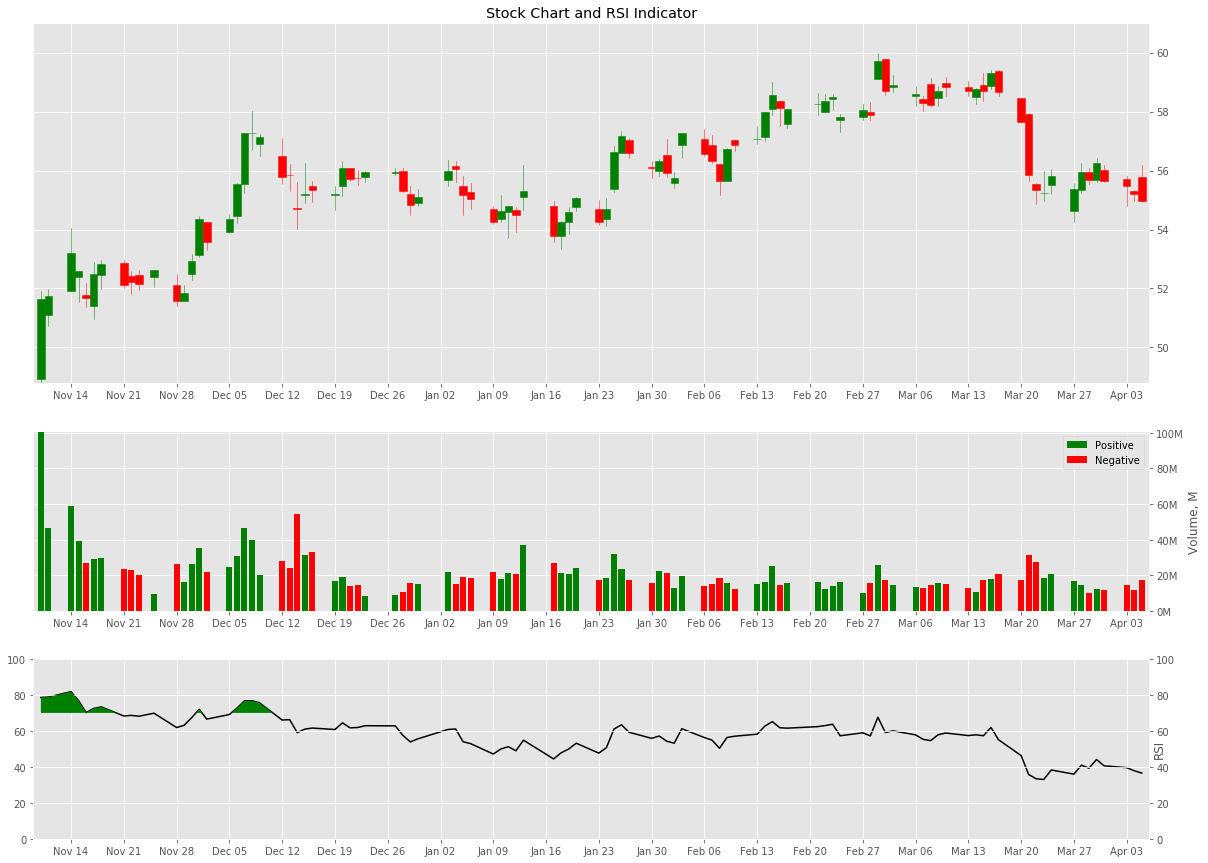

In [6]:
plot_data('Stock Chart and RSI Indicator', df[-100:])